<a href="https://colab.research.google.com/github/AbhayKaushik-ml/CODSOFT/blob/main/SMS_SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading File

In [6]:
train_df = pd.read_csv("spam.csv",encoding='latin-1')

# Data Overview

In [7]:
train_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Data Cleaning

In [8]:
train_df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
train_df.rename(columns={"v1": "Type", "v2": "SMS"}, inplace=True)
train_df.head()

,Type,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
train_df.isnull().sum()

,0
Type,0
SMS,0


In [10]:
train_df.duplicated().sum()

403

In [12]:
train_df.drop_duplicates(inplace=True)

In [13]:
train_df.describe()

,Type,SMS
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Data Visualization

<ipython-input-24-ac5110a6fb70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type', data=train_df, palette='Set2', saturation=0.8)


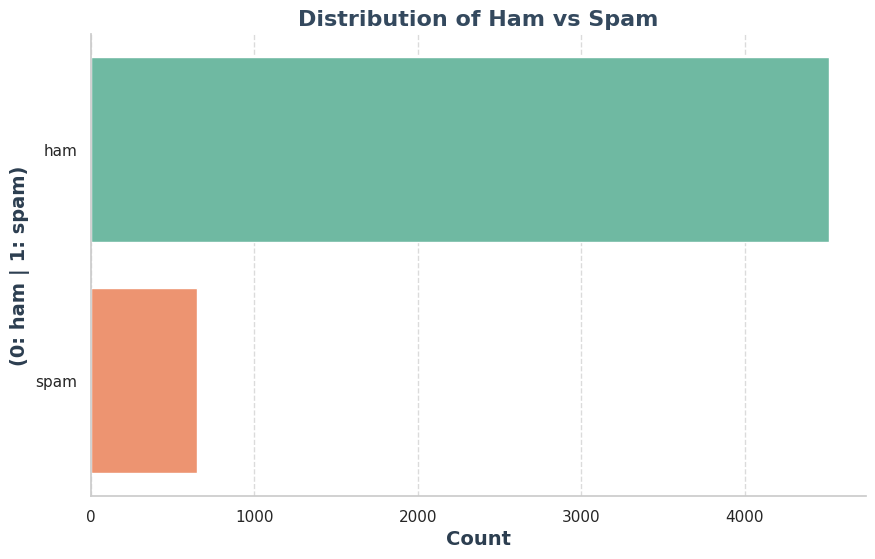

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=train_df, palette='Set2', saturation=0.8)
plt.ylabel('(0: ham | 1: spam)', fontsize=14, fontweight='bold', color='#2C3E50')
plt.xlabel('Count', fontsize=14, fontweight='bold', color='#2C3E50')
plt.title('Distribution of Ham vs Spam', fontsize=16, fontweight='bold', color='#34495E')
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine(top=True, right=True)
plt.show()


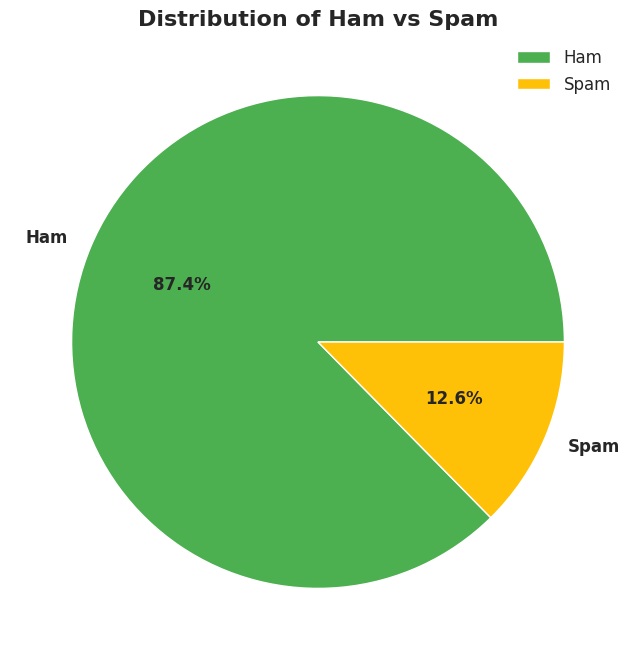

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(train_df['Type'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['#4CAF50', '#FFC107'], wedgeprops={'edgecolor': 'w'}, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Distribution of Ham vs Spam', fontsize=16, fontweight='bold')
plt.legend(labels=['Ham', 'Spam'], loc='best', fontsize=12, frameon=False)
plt.show()

# Data Preprocessing

In [31]:
train_df.Type = [0 if value=="ham" else 1 for value in train_df.Type]
train_df.head()

,Type,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Splitting Data

In [33]:
X = train_df['SMS']
y = train_df['Type']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

# TF-IDF vectorizer

In [40]:
nltk.download('stopwords')
vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_fs = vectorizer.fit_transform(X_train).toarray()
X_test_fs = vectorizer.transform(X_test).toarray()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Model Building, Training and Accuracy calculation

In [41]:
model = MultinomialNB().fit(X_train_fs, y_train)
y_pred = model.predict(X_test_fs)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score * 100:.2f}%")


Accuracy: 96.13%
